# Reinforced Learning



# Upper Confidence Bound

## The multi-Armed Bandit Problem

This is not the only problem that can be used to learn reniforcement learning, another one would be the training of a robot dog and getting it to learn how to move.

In reinforcement learning we reward the positive outcome by giving the algorithm a 1 for each time it does the desired outcome. Most of this is more of a topic on Artificial Intelligence than Machine learning.

For the Multi-Armed Bandit Problem:

* This is a slot machine in a casino
* The problem is what does a respondent do we they come to a full set of these machines and not just one.
* Each machine has a distribution out of which it picks results
* The individual does not know the distribution in advance and it can also be different for each machine
* The goal is to find the best distributions for us so we can make the most money.

There are two key things that need to be done here:

* Explore - this is to discover the ideal machine
* Exploit - taking our findings and use it to our benefit.

There is also a concept of Regret which can be looked at - this is when we are doing a sub-optimal decision and not going with the outcome that would be best for us.

If little exploration is done then we may use a sub optimal machine as we don't have a full view on what is the most optimal machine.

The most common application of this - is advertising.

## Upper Confidence Bound

We will be looking at the following for our problem:

* We have d arms. For example the arms are ads that we display to users each time they connect to a web page
* Each time a user connects to this web page that makes a round
* At each round n, we choose one ad to display to the user
* at each round n, ad i gives a reward if the user clicked on the ad or a 0 if they did not
* our goal is to maximise the total reward we get over many rounds

The intuition:

* We don't know the expected value for each of the items.
* We assume that we have a starting value which is equal for each item.
* The Algorithm will create a confidence band for each of these starting values and we go on the assumption that the confidence band will include the actual expected value
* The Confidence band will be very large to start off with.

The first step is the following:

* We actual run the scenario either if someone clicked on the ad or not
    * if they did not click on the ad then the starting value will reduce and we will move it so it starts to converge with the actual expected value
    * now that we have further information, the confidence interval becomes smaller
    * We keep doing this step for the item that has the highest confidence bound if there is a tie we do a random value.

Since we have a higher number of values in the data the confidence bound decreases as we have higher confidence

## The Calculation:

### Importing the libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### import the dataset:

In [2]:
dataset = pd.read_csv('data\\Ads_CTR_Optimisation.csv')

dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### implementation of the Algorithm

The Algorithm needs to go through the following steps:

 1. At each round n, we consider two numbers
    1. $N_i (n)$ - the number of times the ad $i$ was selected up to round $n$
    2. $R_i (n)$ - the sum of rewards of the ad $i$ up to round $n$.
 2. From these numbers we compute:
    1. the average reward of ad $i$ up to round $n$:

    $\bar{r}_i(n) = \frac{R_i (n)}{N_i(n)}$

    2. The confidence interval $[\bar{r}_i - \vartriangle_i(n),\bar{r}_i(n) = \vartriangle_i(n)]$ at round $n$ with

     $\vartriangle_i(n) = \sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}}$
 3. We select the ad i that has the maximum UCB $\bar{r}_i(n) + \vartriangle_i(n)$

Now to code it:

In [3]:
import math

N = 10000 #Variable of the total number of users / rounds
d = 10 #Number of adverts
ads_selected = [] #list of the times the advert was selected
number_of_selections = [0]*d #this will create a list of 10 zero's
sum_of_rewards = [0]*d # this will be the sum of rewards for the adverts
total_reward = 0

for n in range(0,N): #go through all of the data we have
    ad  = 0
    max_upper_bound = 0
    for i in range (0,d): #iterate over the adverts
        if number_of_selections[i] > 0: #Check to see if we don't get an undefined error in the later
            average_reward = sum_of_rewards[i] / number_of_selections[i] #Average number of rewards of the individual advert (rewards given based on endorsements)
            delta_i = math.sqrt((3/2)*(math.log(n+1)/number_of_selections[i])) #calculate the delta we add to the confidence bound
            upper_bound = average_reward + delta_i #Create the upper bound based on the average reward + the Delta
        else:
            upper_bound = 1e400 #if there has been no selections made then we automatically put the upper bound to a very high number, this will eliminate the first d rounds
        if upper_bound> max_upper_bound: #Evaluate if the current upper bound is the maximum
            max_upper_bound = upper_bound #if it is the maximum then set it as the new maximum
            ad = i #select the advert that is associated with this maximum
    ads_selected.append(ad) #Create a list of the times an advert was selected based on the confidence bound
    number_of_selections[ad] +=  1 #Increase the number of times we have selected an advert in the list for the calculations
    reward = dataset.values[n,ad] # set the reward equal to a 1 or 0 based on if the user clicked on the advert
    sum_of_rewards[ad] = sum_of_rewards[ad] +reward #increase the total reward of the advert based on the yes no above
    total_reward += reward #number of rewards given in total

## Visulizing the result

We will now demonstrate the number of times an item is selected:

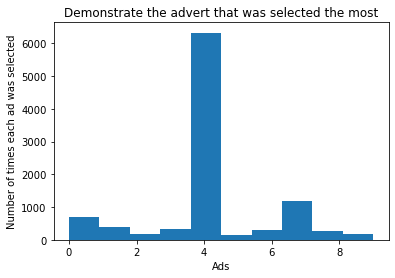

In [4]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.title('Demonstrate the advert that was selected the most')
plt.show()

ads_selected = pd.DataFrame(ads_selected)